In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar

folder = "data_FS_paper/"

In [2]:
!ls $folder

dat_N_10_NL_10_0.txt   dat_N_28_NL_14_19.txt  dat_N_32_NL_8_18.txt
dat_N_10_NL_10_1.txt   dat_N_28_NL_14_2.txt   dat_N_32_NL_8_19.txt
dat_N_10_NL_10_2.txt   dat_N_28_NL_14_20.txt  dat_N_32_NL_8_2.txt
dat_N_10_NL_10_3.txt   dat_N_28_NL_14_21.txt  dat_N_32_NL_8_20.txt
dat_N_10_NL_10_4.txt   dat_N_28_NL_14_22.txt  dat_N_32_NL_8_21.txt
dat_N_10_NL_10_5.txt   dat_N_28_NL_14_23.txt  dat_N_32_NL_8_22.txt
dat_N_10_NL_10_6.txt   dat_N_28_NL_14_24.txt  dat_N_32_NL_8_23.txt
dat_N_10_NL_10_7.txt   dat_N_28_NL_14_25.txt  dat_N_32_NL_8_24.txt
dat_N_10_NL_10_8.txt   dat_N_28_NL_14_26.txt  dat_N_32_NL_8_25.txt
dat_N_10_NL_10_9.txt   dat_N_28_NL_14_27.txt  dat_N_32_NL_8_26.txt
dat_N_10_NL_4_0.txt    dat_N_28_NL_14_3.txt   dat_N_32_NL_8_27.txt
dat_N_10_NL_4_1.txt    dat_N_28_NL_14_4.txt   dat_N_32_NL_8_28.txt
dat_N_10_NL_4_2.txt    dat_N_28_NL_14_5.txt   dat_N_32_NL_8_29.txt
dat_N_10_NL_4_3.txt    dat_N_28_NL_14_6.txt   dat_N_32_NL_8_3.txt
dat_N_10_NL_4_4.txt    dat_N_28_NL_14_7.txt   dat_N_32_NL_8_30.t

In [3]:
v_N = np.array([20,24,28,32,36,40])
v_p = np.array([0.25,0.5,0.75,1.])

prefix = "dat"
suffix = ".txt"

In [6]:
N_N = v_N.size
N_p = v_p.size

data_list = []
err_list = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N+1,N+1))
    err_N = np.zeros((N_p,N+1,N+1))
    num_N = np.zeros((N_p,N))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i in range(N):
            fn = folder + prefix + "_N_" + str(N) + "_p_" + "{:.6f}".format(p) + "_" + str(i) + suffix
            data = np.loadtxt(fn)
            
            num_N[i_p,i] = data.shape[0]

            dat_N[i_p,i+1,:] = np.mean(data,axis=0)
            err_N[i_p,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i])
        
    data_list.append(dat_N)
    err_list.append(err_N)
    count += 1
    bar.update(count)
bar.finish()
    
#outfile = folder + "save" + "_N_" + str(N_spin) + "_Ns_" + str(N_sample)
#np.save(outfile, full_data)

[========================================================================] 100%


In [7]:
#file = folder + "save" + "_N_" + str(N_spin) + "_Ns_" + str(N_sample) +".npy"

#full_data = np.load(file)

#mean_S = np.mean(full_data,axis=3)
#err_S = np.std(full_data,axis=3)/np.sqrt(N_sample)

In [8]:
print(data_list[0][2,5,5])
print(data_list[1][2,5,5])
print(data_list[2][2,5,5])
print(fn)

0.25115923883928554
0.23270606651785705
0.2114267912946428
data_U_p/dat_N_35_p_0.950000_34.txt


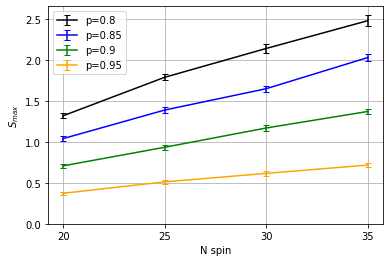

In [17]:
plt.figure(figsize=(6,4))

x_axis = v_N

clr = ["black", "blue", "green", "orange","red"]

for i_p in range(N_p):
    p = v_p[i_p]
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(data_list[i_N][i_p], axis=None), data_list[i_N][i_p].shape)
        dat_plot.append(data_list[i_N][i_p][ind])
        dat_err.append(err_list[i_N][i_p][ind])

    _ = plt.errorbar(v_N,dat_plot, yerr=dat_err, capsize=3, color = clr[i_p], label="p="+str(p))


plt.ylim(bottom=0.)
plt.grid(True)

plt.xticks(v_N)

plt.xlabel("N spin")
plt.ylabel(r"$S_{max}$")
plt.legend()

plt.savefig("Smax_U_p.png", bbox_inches='tight')

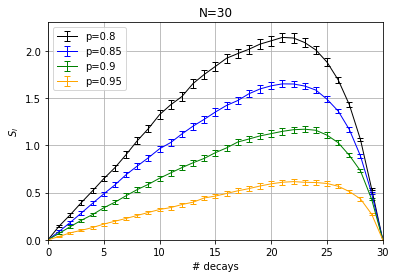

In [16]:
N_plot = 30
i_site = (N_plot+1)//2

plt.figure(figsize=(6,4))

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)
clr = ["black", "blue", "green", "orange","red"]

for i_p in range(N_p):
    dat = data_list[i_N][i_p,:,i_site]
    err = err_list[i_N][i_p,:,i_site]

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=clr[i_p], label="p="+str(v_p[i_p]))
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("# decays")
plt.ylabel(r"$S_l$")
plt.legend()
plt.title("N="+str(N_plot))

plt.savefig("S_half_U_p_" + str(N_plot) + "_site_" + ".png", bbox_inches='tight')

Text(0.5, 1.0, 'N=25')

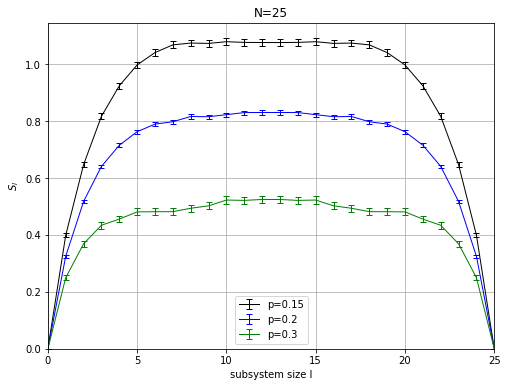

In [30]:
N_plot = 25
i_jump = 17

plt.figure(figsize=(8,6))

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)
clr = ["black", "blue", "green", "orange","red"]

for i_p in range(N_p):
    dat = data_list[i_N][i_p,i_jump,:]
    err = err_list[i_N][i_p,i_jump,:]
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=clr[i_p], label="p="+str(v_p[i_p]))
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")
plt.legend()
plt.title("N="+str(N_plot))

#plt.savefig("Si_" + str(N_spin) + "_site_" + str(i_site) + ".png")